In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# data set: kaggle <Titanic - Machine Learning from Disaster>
# https://www.kaggle.com/competitions/titanic/overview
df = pd.read_csv('/content/drive/MyDrive/Ybigta_session/0202 시각화/train.csv')
df.drop(['Name','Ticket'], axis=1, inplace=True)
#df.Embarked=df.Embarked.apply(lambda x:'Cherbourg' if x=='C' else(lambda x:'Queenstown' if x=='Q' else 'Southampton'))
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [197]:
Age_group=[]
for a in df['Age']:
    if (0<=a<10):
        Age_group.append('under 10')
    elif (10<=a<20):
        Age_group.append('teenagers')
    elif (20<=a<30):
        Age_group.append('20s')
    elif (30<=a<40):
        Age_group.append('30s')
    elif (40<=a<40):
        Age_group.append('40s')
    else:
        Age_group.append('50 or more')
df['Age_group']=Age_group
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_group
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,20s
1,2,1,1,female,38.0,1,0,71.2833,C85,C,30s
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,20s
3,4,1,1,female,35.0,1,0,53.1000,C123,S,30s
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,30s


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Age_group    891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [199]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Age_group        0
dtype: int64


In [200]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [201]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [202]:
import plotly.graph_objects as go
import pandas as pd

# Create dimensions
Embarked_dim = go.parcats.Dimension(values=df.Embarked, label='City',categoryarray=['C','Q','S'], ticktext=['Cherbourg','Queenstown','Southampton'])

class_dim = go.parcats.Dimension(
    values=df.Pclass,
    categoryorder='category ascending', label="Class")

gender_dim = go.parcats.Dimension(values=df.Sex, label="Gender")

survival_dim = go.parcats.Dimension(
    values=df.Survived, label="Outcome", categoryarray=[0, 1],
    ticktext=['Dead', 'Survived'])

#age_dim=go.parcats.Dimension(values=df.Age_group)

# Create parcats trace
color = df.Survived;
colorscale = [[0, 'lightblue'], [1, 'Orange']];

fig = go.Figure(data = [go.Parcats(dimensions=[Embarked_dim,class_dim, gender_dim, survival_dim],
        line={'color': color, 'colorscale':colorscale,'shape':'hspline'},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform')])

fig.show()
#plt.savefig('시각화과제.png',dpi=300)

In [203]:
df2=df
df2.Survived=df2.Survived.apply(lambda x:'Survived' if x==1 else 'Dead')

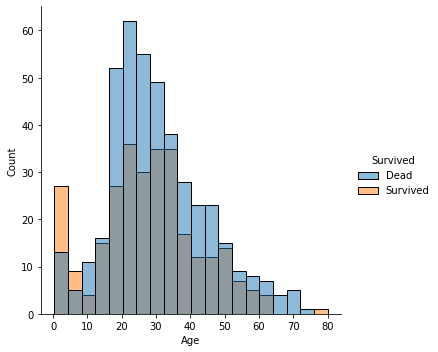

In [204]:
sns.displot(data=df2,x='Age',hue='Survived')
plt.savefig('연령별생존자수.png',dpi=300)

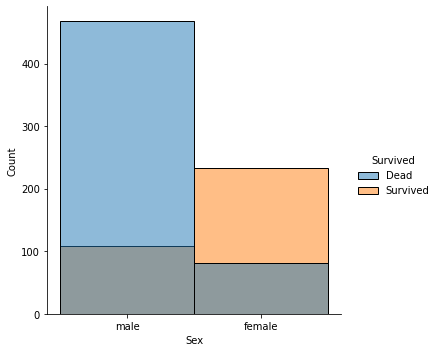

In [205]:
sns.displot(data=df2,x='Sex',hue='Survived')
plt.savefig('성별생존자수.png',dpi=300)

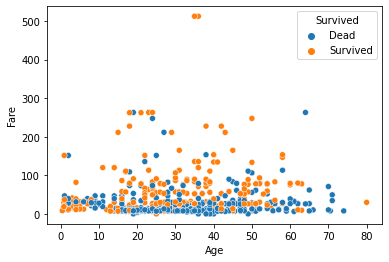

In [207]:
x=df2.Age
y=df2.Fare

sns.scatterplot(data=df2, x=x, y=y, hue='Survived')

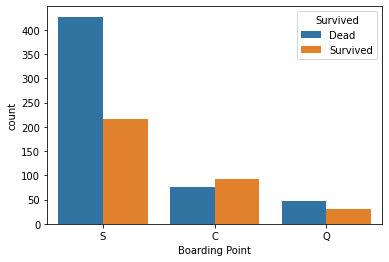

In [208]:
sns.countplot(x = 'Embarked', data = df2, hue='Survived')
plt.xlabel('Boarding Point')

plt.savefig('지역별생존자.png',dpi=300)

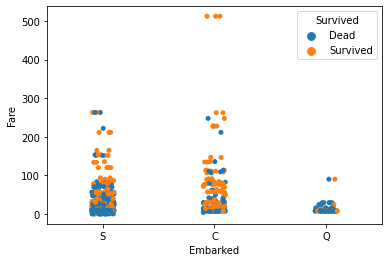

In [209]:
sns.stripplot(x="Embarked", y="Fare", hue="Survived", data=df2, jitter=True)

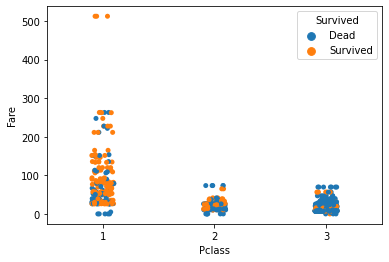

In [210]:
sns.stripplot(x="Pclass", y="Fare", hue="Survived", data=df2, jitter=True)

Text(0.5, 0, 'Survived or not')

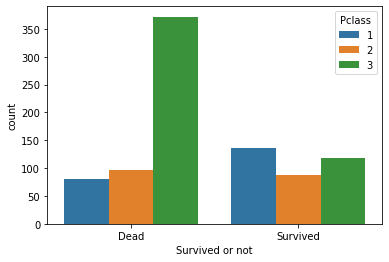

In [212]:
sns.countplot(x = 'Survived', data = df2, hue='Pclass')
plt.xlabel('Survived or not')